## Instructions : 
Download and read the data into your tool of choice.
This should be done programmatically so future maintainers of the code don’t need to download the data manually.
## 
## Q2. Find the average annual income and number of loan applicants by state.


The downloaded dataset was uploaded to the Azure ML Datasets.

And all the interested users can import the dataset to their workspace with the below given credentials for their analysis

In [ ]:
# azureml-core of version 1.0.72 or higher is required
from azureml.core import Workspace, Dataset

subscription_id = '44d80c8e-af1f-4d8a-838c-2beb409a7a83'
resource_group = 'A_Container'
workspace_name = 'adsml'
# Remember to change the workspace_name your workspace name to get access to datasets.
workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='adsassigndata')
dataset.download(target_path='.', overwrite=False)

# Load the Data and import ML libraries


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
#Might be needed deprnding on the jupyter version
%matplotlib inline 


# Observations on Data &  Data Cleaning

In [4]:
#Check for columns with missing values. 
#Drop columns if in case of the missing values exceeds a set threshold
#Drop duplicates if any
def drop_column(file, threshold=0.5):
    loanrec = pd.read_csv(file, skiprows=1, low_memory=False)
    loanrec = loanrec.drop_duplicates()
    loanrec = loanrec.drop(['desc', 'url'], axis=1)
    threshold_count = len(loanrec)*threshold
    loanrec = loanrec.dropna(thresh=threshold_count, axis=1)
    loanrec = loanrec.drop_duplicates()
    return loanrec
df = drop_column('LoanStats3a.csv', threshold=0.5)

## Average Annual Income by State

In [5]:
df.groupby('addr_state')['annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
addr_state,,,,,,,,
AK,86.0,78902.430698,62470.760877,24000.0,45820.00,65676.5,86500.00,540000.0
AL,484.0,63275.835661,48034.176827,12000.0,39225.00,55000.0,75000.00,675048.0
AR,261.0,59946.404674,40223.462206,2000.0,36000.00,49992.0,71352.00,343368.0
AZ,933.0,67799.876420,55318.711128,1896.0,39996.00,55000.0,82000.00,741600.0
CA,7429.0,72221.438542,83635.645777,4080.0,42228.00,60000.0,87000.00,6000000.0
CO,857.0,66823.789627,66514.298618,6500.0,38532.00,57200.0,79000.00,1362000.0
CT,816.0,75707.016336,68441.847822,3500.0,42000.00,60000.0,86000.00,1200000.0
DC,224.0,77794.437500,35262.542491,4888.0,51897.00,72733.5,93250.00,201400.0
DE,136.0,69437.426471,37520.456255,16620.0,45875.00,63998.0,82200.00,295000.0


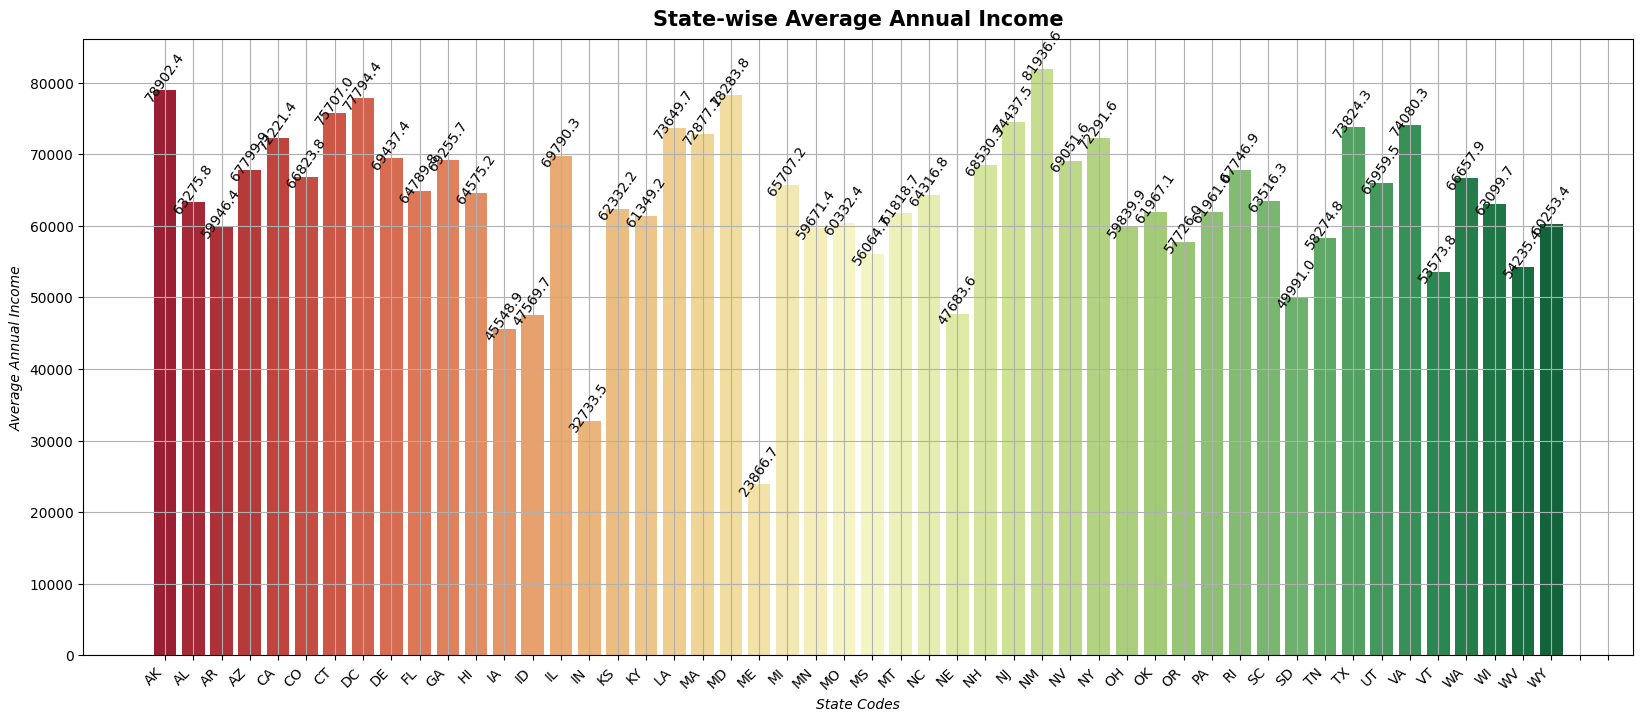

In [6]:
result = df.groupby('addr_state')['annual_inc'].mean() #.plot(kind = "bar")
plt.figure(figsize=(20,8))
ax_07 = sns.barplot(x = result.index, y = result.values, palette='RdYlGn')
ax_07.set_xticklabels(labels=list(result.index), fontsize=10)
plt.setp(ax_07.get_xticklabels(), rotation=0, horizontalalignment='right')
plt.xlabel('State Codes', fontsize= 10, fontstyle='italic')
plt.ylabel('Average Annual Income', fontsize= 10, fontstyle='italic')
plt.title('State-wise Average Annual Income', fontsize= 15, fontweight='bold', pad=10)
plt.ylim(0,100)
plt.xlim(0,100)
   
for p in ax_07.patches:
    ax_07.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), fontsize= 10, textcoords = 'offset points', rotation=55 )
plt.xticks(range(0,100), list(result.index), fontsize=10, rotation=45)
plt.grid(True)
#plt.tight_layout()
plt.autoscale()
plt.show()

In [7]:
df['addr_state'].value_counts(dropna=True)

CA    7429
NY    4065
FL    3104
TX    2915
NJ    1988
IL    1672
PA    1651
GA    1503
VA    1487
MA    1438
OH    1329
MD    1125
AZ     933
WA     888
CO     857
NC     830
CT     816
MI     796
MO     765
MN     652
NV     527
WI     516
SC     489
AL     484
OR     468
LA     461
KY     359
OK     317
KS     298
UT     278
AR     261
DC     224
RI     208
NM     205
NH     188
WV     187
HI     181
DE     136
MT      96
WY      87
AK      86
SD      67
VT      57
TN      32
MS      26
IN      19
IA      12
NE      11
ID       9
ME       3
Name: addr_state, dtype: int64

## Sate-wise number of Loan Applications

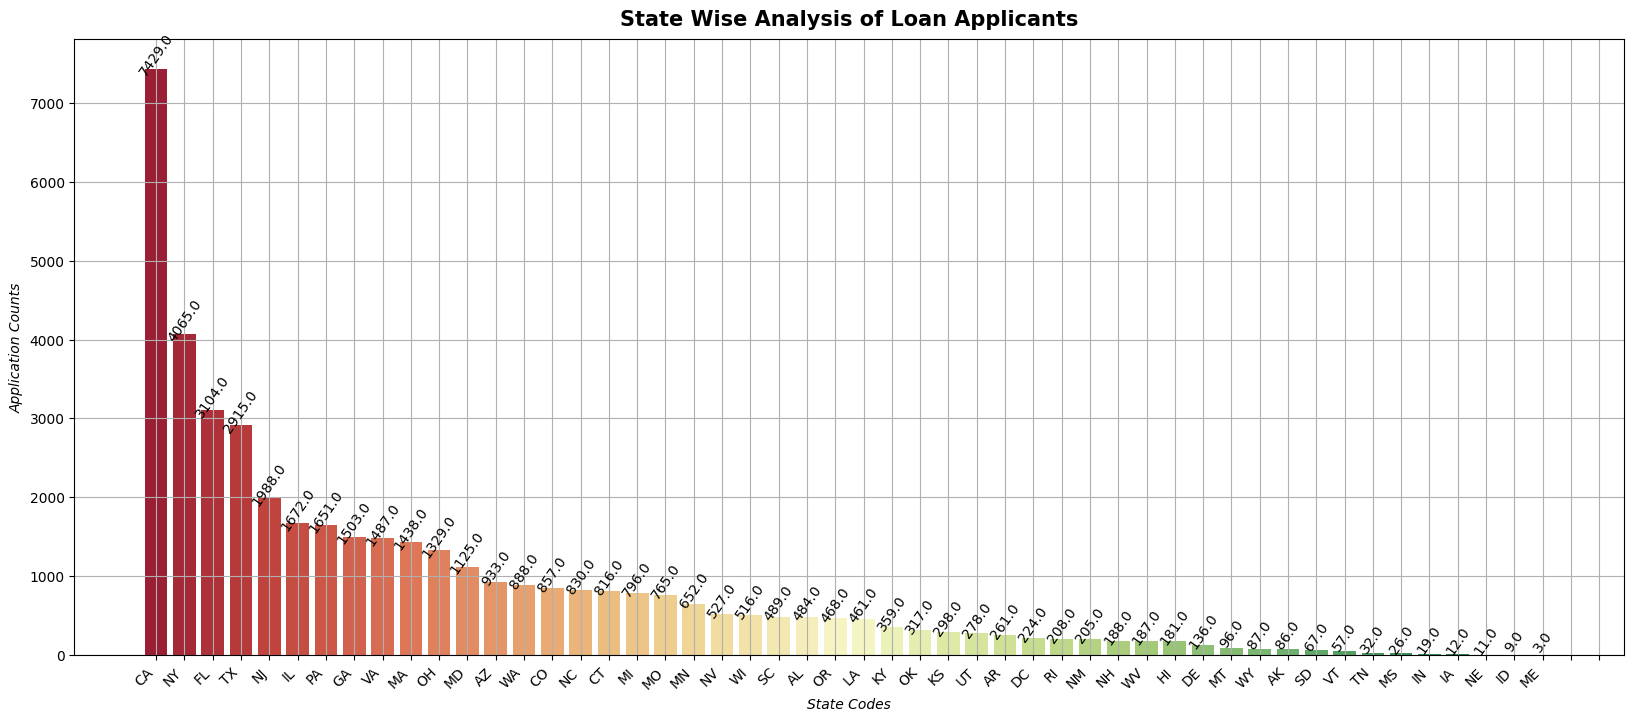

In [8]:
#result = processed_load.groupby('addr_state')['annual_inc'].mean() #.plot(kind = "bar")
result = df['addr_state'].value_counts(dropna=True)
plt.figure(figsize=(20,8))
ax_07 = sns.barplot(x = result.index, y = result.values, palette='RdYlGn')
ax_07.set_xticklabels(labels=list(result.index), fontsize=10)
plt.setp(ax_07.get_xticklabels(), rotation=0, horizontalalignment='right')
plt.xlabel('State Codes', fontsize= 10, fontstyle='italic')
plt.ylabel('Application Counts', fontsize= 10, fontstyle='italic')
plt.title('State Wise Analysis of Loan Applicants', fontsize= 15, fontweight='bold', pad=10)
plt.ylim(0,100)
plt.xlim(0,100)
   
for p in ax_07.patches:
    ax_07.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), fontsize= 10, textcoords = 'offset points', rotation=55 )
plt.xticks(range(0,100), list(result.index), fontsize=10, rotation=45)
plt.grid(True)
#plt.tight_layout()
plt.autoscale()
plt.show()

# 3. Consider the annual income of applicants from West Virginia and New Mexico.
#  
# a. Plot a histogram comparing the annual income of applicants from these states.
#  
# b. Form and test a hypothesis regarding the average annual incomes of the residents of West Virginia and New Mexico.

### a. Plot a histogram comparing the annual income of applicants from these states.

[Text(0.5, 1.0, 'Histogram Plot:Annual Income-WV(US$)')]

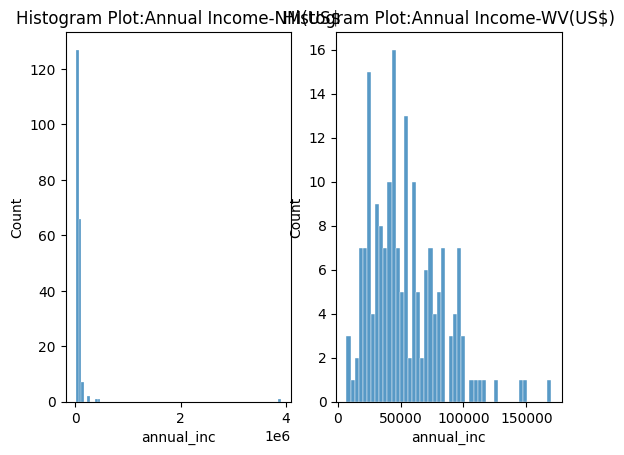

In [9]:
## Plot a histogram comparing the annual income of applicants from these states.
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [12, 4]
plt.rcParams["figure.autolayout"] = True
sns.set(style='white')
sns.histplot(df.loc[df['addr_state']=='NM']['annual_inc'],kde=False,bins=75,ax=axes[0]).set(title="Histogram Plot:Annual Income-NM(US$")
sns.histplot(df.loc[df['addr_state']=='WV']['annual_inc'], kde=False,bins=50,ax=axes[1]).set(title="Histogram Plot:Annual Income-WV(US$)")

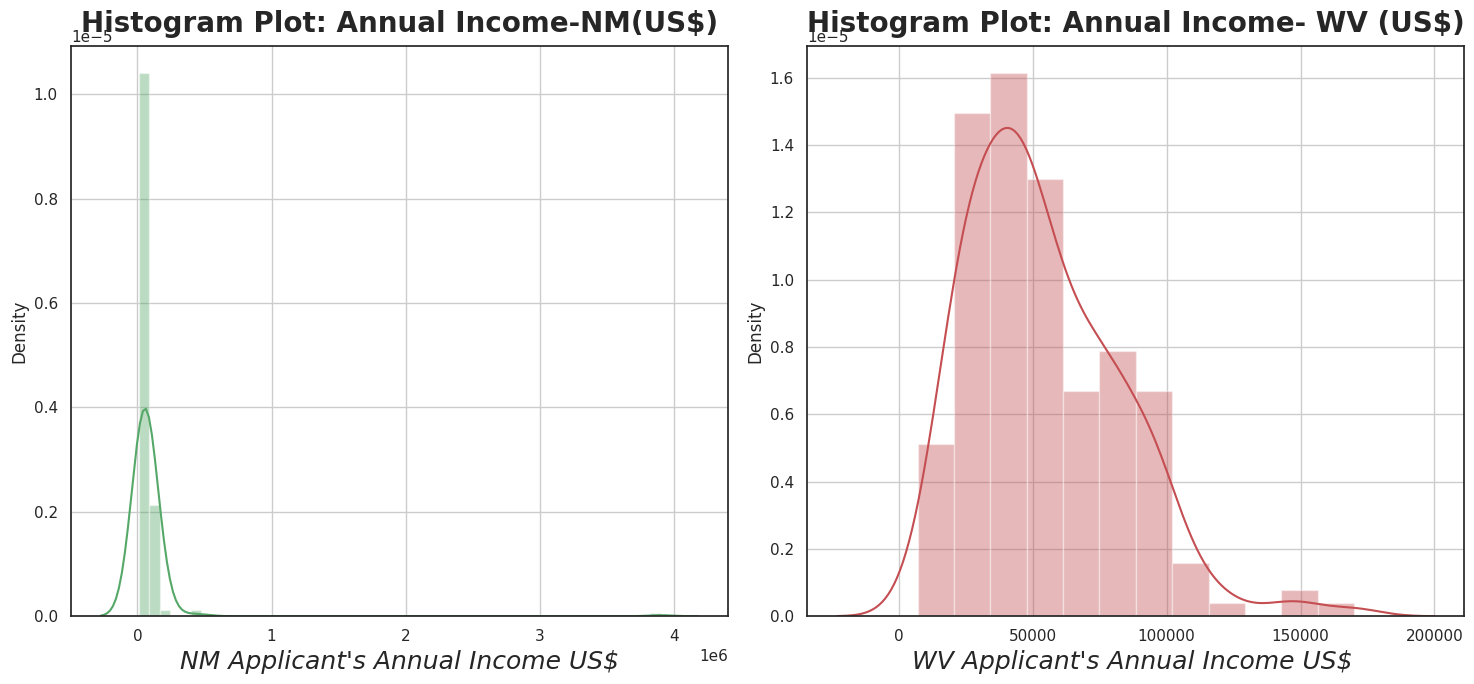

In [10]:
import warnings
warnings.filterwarnings('ignore')
result1 = df.loc[df['addr_state']=='NM']['annual_inc']
result2 = df.loc[df['addr_state']=='WV']['annual_inc']

plt.figure(figsize=(15,7))
sns.set(style='white')

plt.subplot(1, 2, 1)
sns.distplot(result1.values,hist= True ,color="g")
plt.title("Histogram Plot: Annual Income-NM(US$)", fontsize= 20, fontweight='bold', pad=10)
plt.xlabel("NM Applicant's Annual Income US$", fontsize= 18, fontstyle='italic')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.distplot(result2.values, hist= True ,color="r")
plt.title("Histogram Plot: Annual Income- WV (US$)", fontsize= 20, fontweight='bold', pad=10)
plt.xlabel("WV Applicant's Annual Income US$ ", fontsize= 18, fontstyle='italic')
plt.grid(True)
plt.tight_layout()
plt.autoscale()
plt.tight_layout()
plt.show()

### b. Form and test a hypothesis regarding the average annual incomes of the residents of West Virginia and New Mexico.

### Hypothesis: Average annual income of New Mexico loan applicants is same as the average annual income of West Virginia loan applicants.

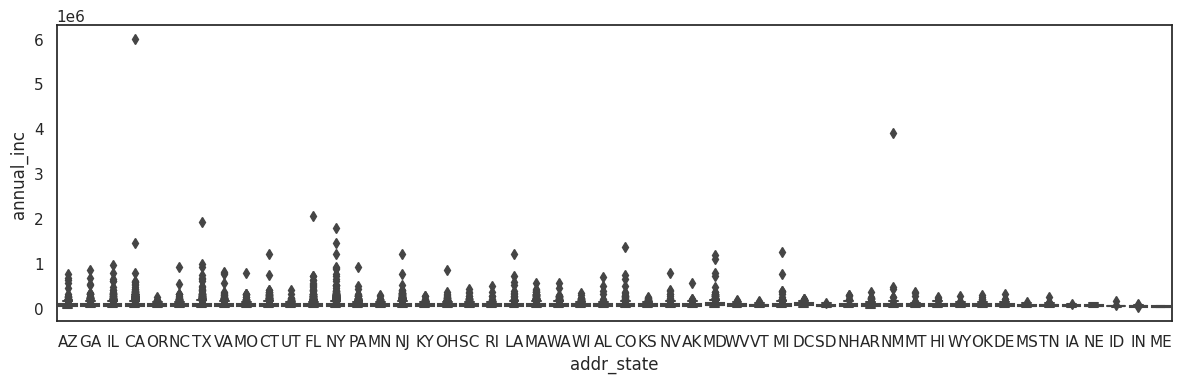

In [11]:
## Boxplot comparing the annual income of applicants from all US states.
sns.boxplot(x="addr_state",y="annual_inc",data=df)

[Text(0.5, 1.0, 'boxplot:Annual Income-WV(US$)')]

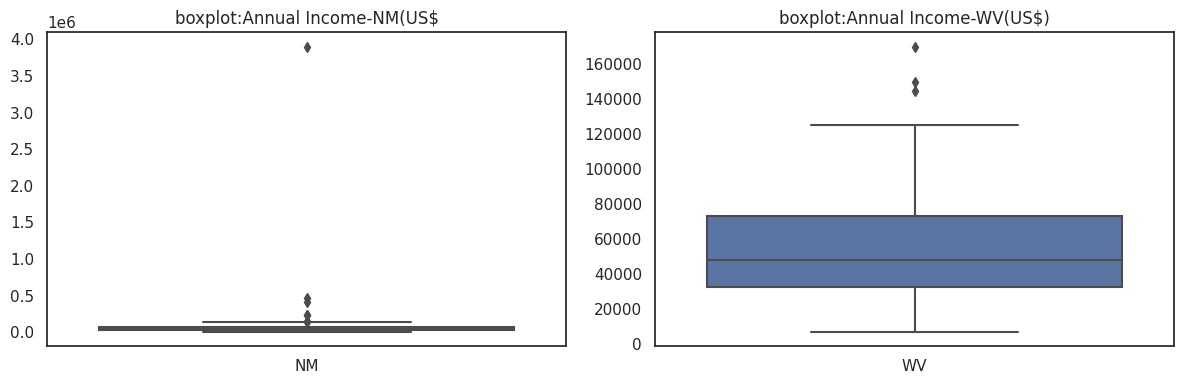

In [12]:
result1V_NM = df.loc[df['addr_state'] == 'NM', 'addr_state']
result1D_NM = df.loc[df['addr_state'] == 'NM', 'annual_inc']

result2V_WV = df.loc[df['addr_state'] == 'WV', 'addr_state']
result2D_WV = df.loc[df['addr_state'] == 'WV', 'annual_inc']
## Plot a Boxplot comparing the annual income of applicants from New Mexico and West Virginia states.
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [12, 4]
plt.rcParams["figure.autolayout"] = True
sns.set(style='white')
sns.boxplot(x=result1V_NM.values,y=result1D_NM.values,ax=axes[0]).set(title="boxplot:Annual Income-NM(US$")
sns.boxplot(x=result2V_WV.values,y=result2D_WV.values,ax=axes[1]).set(title="boxplot:Annual Income-WV(US$)")

In [13]:
# Independent T-Test on the two independent samples  
# Importing the required libraries
from scipy.stats import ttest_ind
  
# Calculating the mean of New Mexico and West Virginia Applicant's Annual income  
mean1 = df.loc[df['addr_state']=='NM']['annual_inc'].mean()
mean2 = df.loc[df['addr_state']=='WV']['annual_inc'].mean()
  
# Print mean values
print("New Mexico group mean value:", mean1)
print("West Verginia group mean value:", mean2)
  
# Calculating standard deviation
std1 = df.loc[df['addr_state']=='NM']['annual_inc'].std()  
std2 = df.loc[df['addr_state']=='WV']['annual_inc'].std()
  
# Printing standard deviation values
print("New Mexico group  std value:", std1)
print("West Verginia group std value:", std2)
  
# Implementing the t-test
t_test,p_val = ttest_ind(result1.values, result2.values)
print("The P-value is: ", p_val)  
  
# taking the threshold value as 0.05 or 5%  
if p_val < 0.05:  
    print("We can reject the null hypothesis")  
else:
    print("We can accept the null hypothesis") 

New Mexico group mean value: 81936.60448780489
West Verginia group mean value: 54235.40294117648
New Mexico group  std value: 272573.77452335024
West Verginia group std value: 28509.979149124363
The P-value is:  0.16754494014013024
We can accept the null hypothesis


## 4. We’re interested in predicting which applicants will default on their loan.
## 
## a. Build a derived variable representing whether an applicant defaulted on their loan. Consider a loan that is “Charged Off” as a default, and a loan that is “Fully Paid” to not have defaulted.
## 
## b. Build a binary classification model to predict which loans will default.Your model should take a data set of applicants as input and return the probability of default for each applicant. You should thoroughly describe how you developed and validated your model and explain any assumptions you made
## 
## c. Imagine your client is considering entering the lending market but is very risk averse (they prefer low default rates even if it means accepting lower rates of return). Develop a strategy for entering this market.Some things to consider:
## 
## i. Which locations should we target?
## 
## ii. To which segments of the population should we advertise?
## 
## iii. Any other helpful strategies you can think of to keep default rates low?

# Exploratory Data Analysis

Data Analysis

The objective is to identify predictors of default for approval/rejection of the loan so that the risk is minimized.

The Lending Club data majorly consists of 3 types of variables -

Applicant demographic variables such occupation, employment details etc.
Loan metrics such as amount of loan, interest rate, purpose of loan etc.
Customer actions variables such as delinquent 2 years, revolving balance, next payment date etc.

As the customer actions variables will not be available at the time of loan application, and hence those can not be used as predictors for credit approval.

Going forward, analysis uses only the other two types of variables.

In [14]:
df = df.drop(["out_prncp", "out_prncp_inv", "collections_12_mths_ex_med", "policy_code", "chargeoff_within_12_mths","acc_now_delinq","delinq_amnt","pymnt_plan","delinq_2yrs", "inq_last_6mths","total_pymnt","total_pymnt_inv","total_rec_prncp", "total_rec_int","total_rec_late_fee","recoveries",
"collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","last_credit_pull_d", "tax_liens","hardship_flag","debt_settlement_flag"], axis=1)

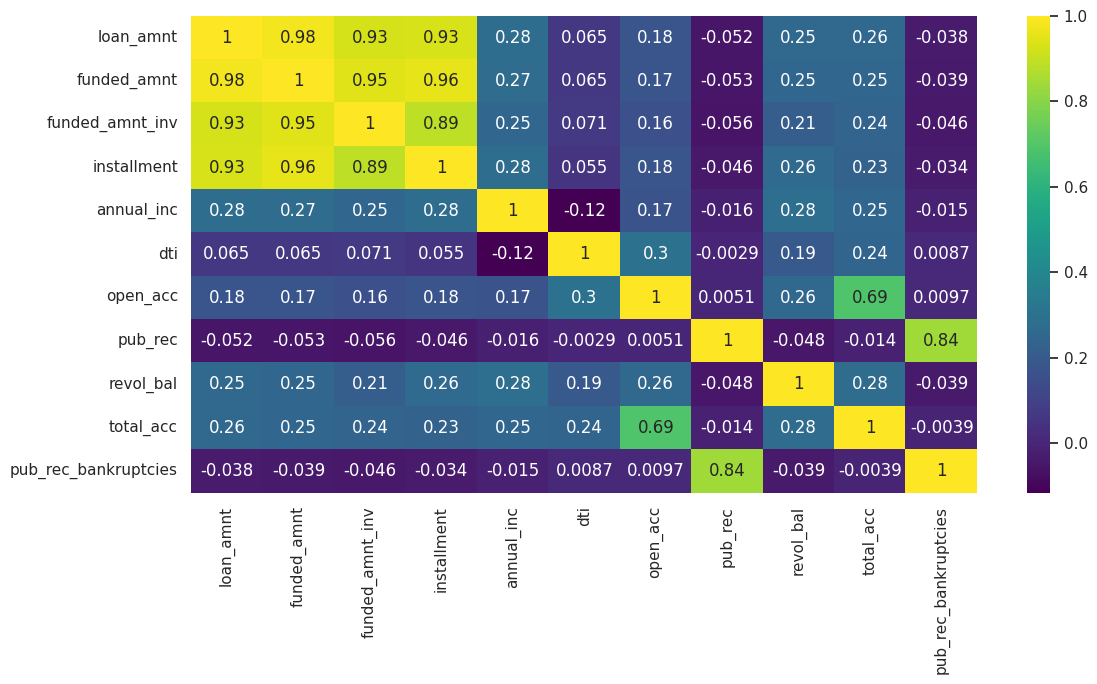

In [15]:
# Visualising correlation matrix
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap="viridis")

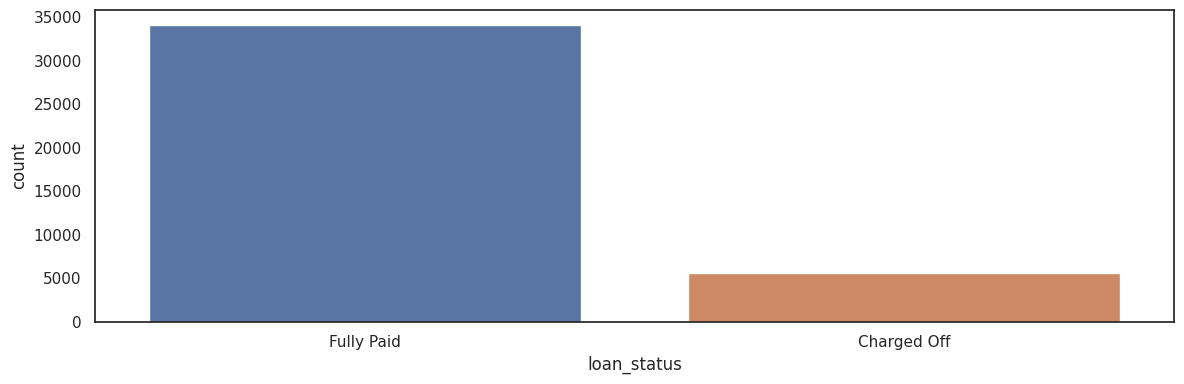

In [16]:
#Distribution of Target Variable
df1 = df[(df["loan_status"] == "Fully Paid") | (df["loan_status"] == "Charged Off")]
sns.countplot(x="loan_status", data=df1)

#### Observation:There is a class imbalance we have more cases of 'Fully Paid' than the 'Charged Off'

In [17]:
# checking mean value of loan approved
# We just take "Fully Paid" and "Charged Off" columns
df = df[(df["loan_status"] == "Fully Paid") | (df["loan_status"] == "Charged Off")]
mapping_dict = {
    "loan_status": {
        "Fully Paid": 1,
        "Charged Off": 0
    }
}
df = df.replace(mapping_dict)
df.groupby("loan_status")["loan_amnt"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,5670.0,12147.491182,8108.982549,900.0,5612.5,10000.0,16750.0,35000.0
1,34116.0,11079.101448,7341.022332,500.0,5500.0,9837.5,15000.0,35000.0


### Observation  : From above statistics, it can be inferred that,there is not a much difference between the defaulters w.r.t to loan amount perse.

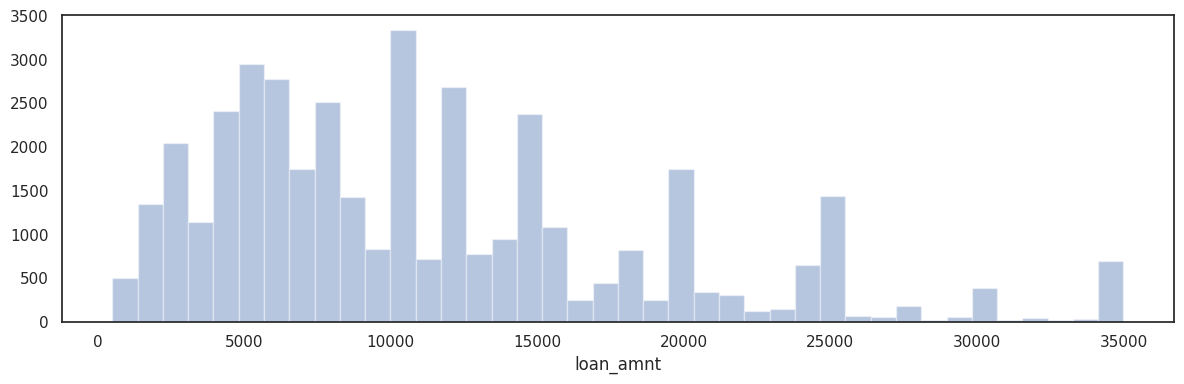

In [18]:
#distribution of loan amount
plt.figure(figsize=(12,4))
sns.distplot(df["loan_amnt"],kde=False,bins=40)

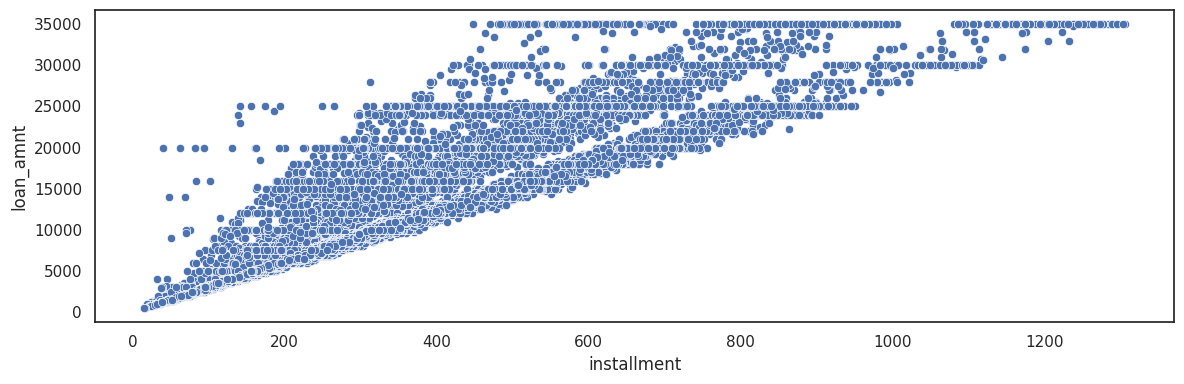

In [19]:
#creating scatter plot of installment and loan amount
sns.scatterplot(x="installment",y="loan_amnt",data=df)

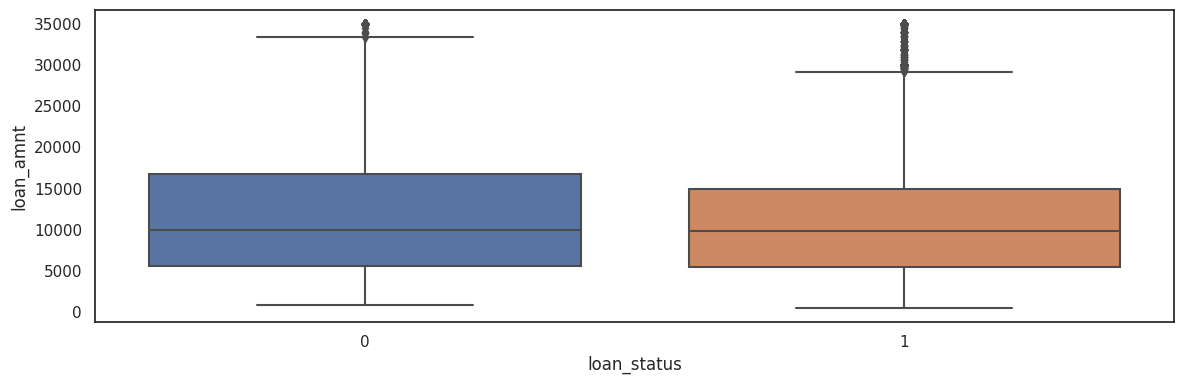

In [20]:
# creating boxplot 
sns.boxplot(x="loan_status",y="loan_amnt",data=df)

### Observation: The loan installment is correlated to to loan amount and the reason being loan installment is calculated based on loan amount.

In [21]:
#checking unique values of grade
df["grade"].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [22]:
#checking unique values for subgrade
df["sub_grade"].unique()

array(['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F4', 'F1', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1',
       'F5', 'G5'], dtype=object)

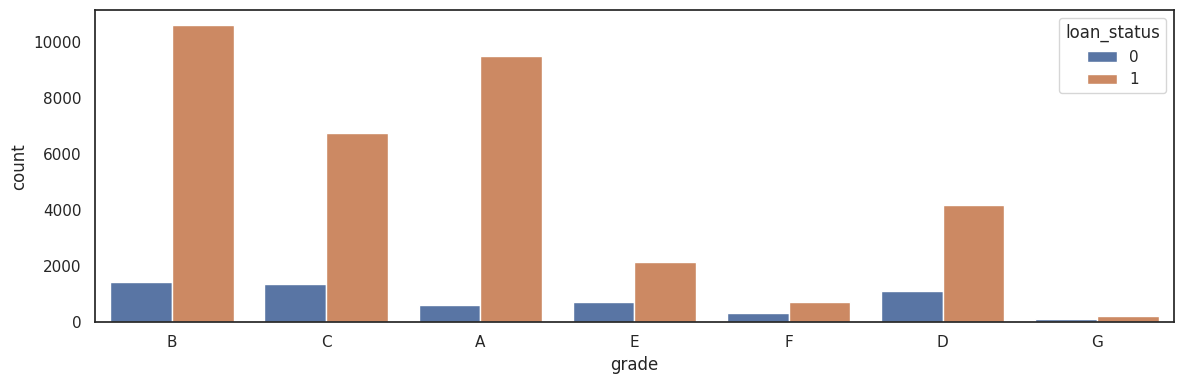

In [21]:
#checking plot for grade
sns.countplot(x="grade",hue="loan_status",data=df)

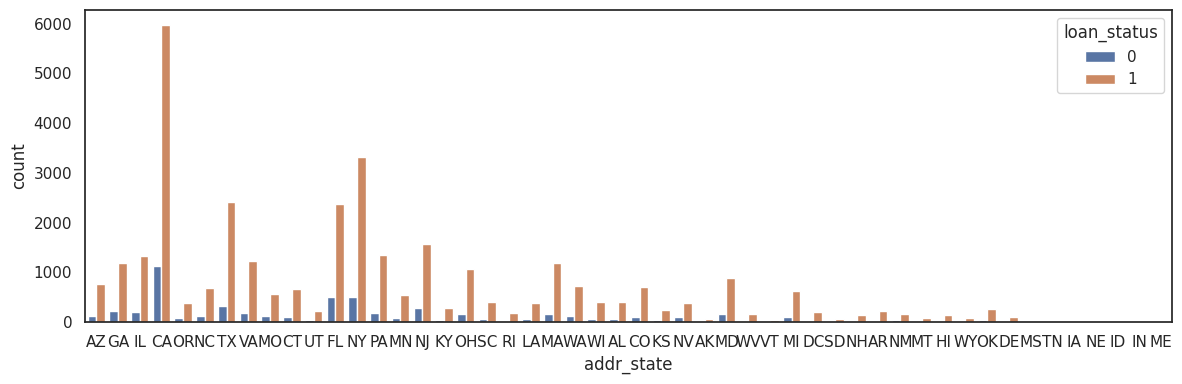

In [22]:
#checking plot for grade
sns.countplot(x="addr_state",hue="loan_status",data=df)

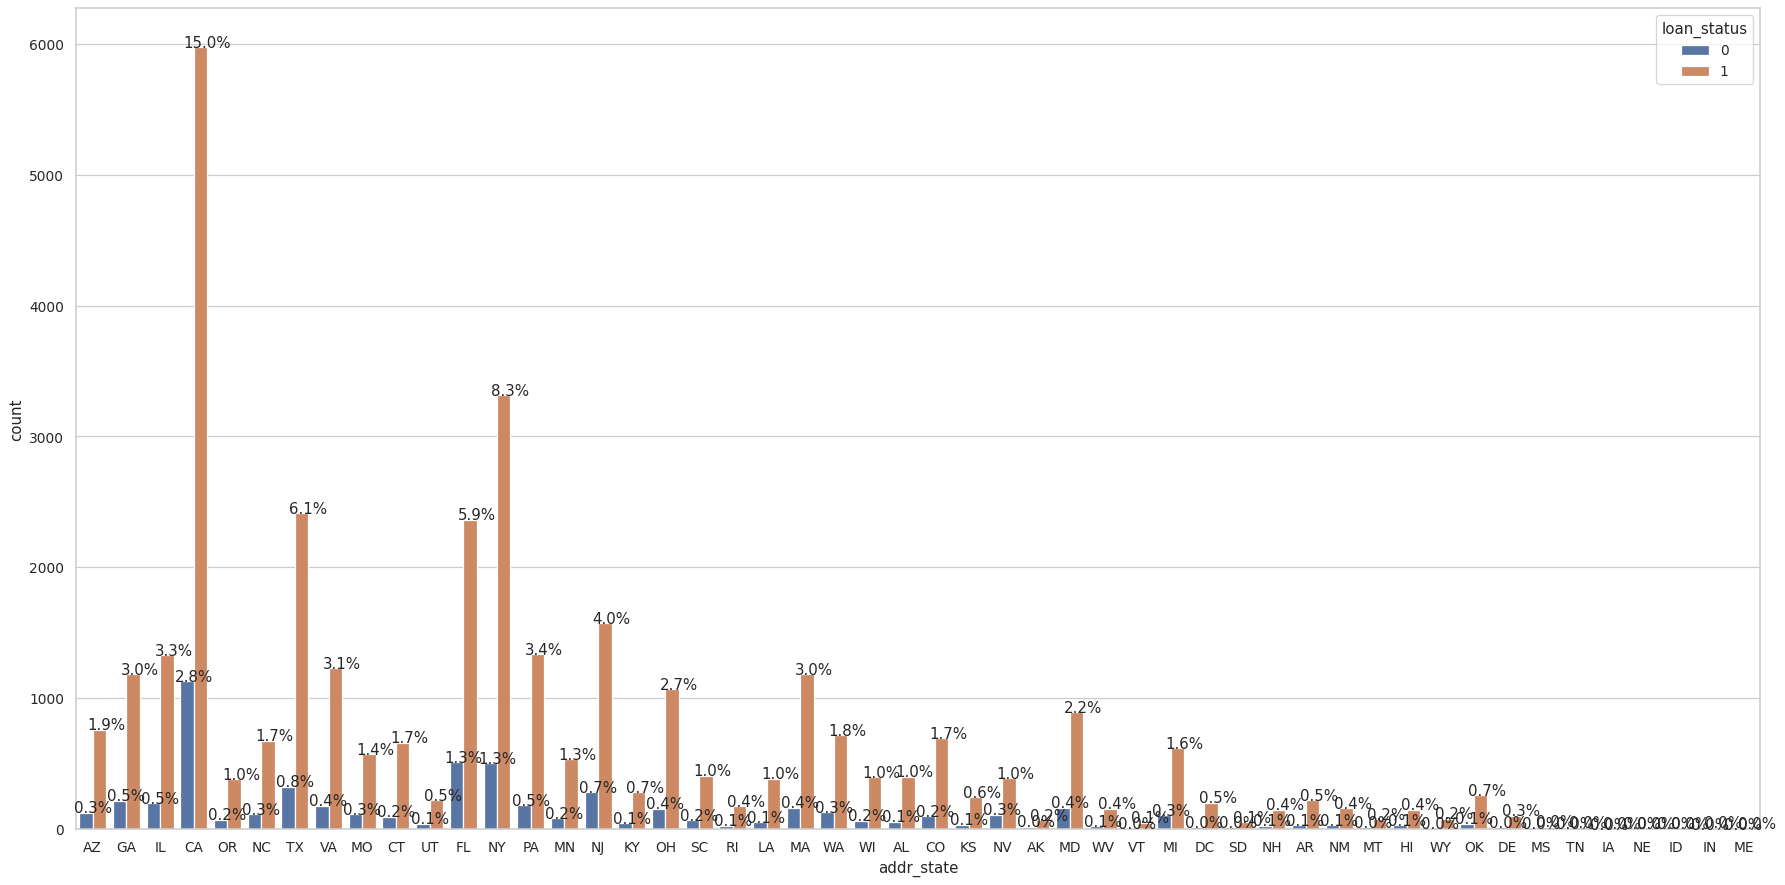

In [38]:
sns.set(style="whitegrid")
#plt.figure(figsize=(20,15))
plt.figure(figsize=(20, 10),dpi = 90)
total = float(len(df))
ax = sns.countplot(x="addr_state", hue="loan_status", data=df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

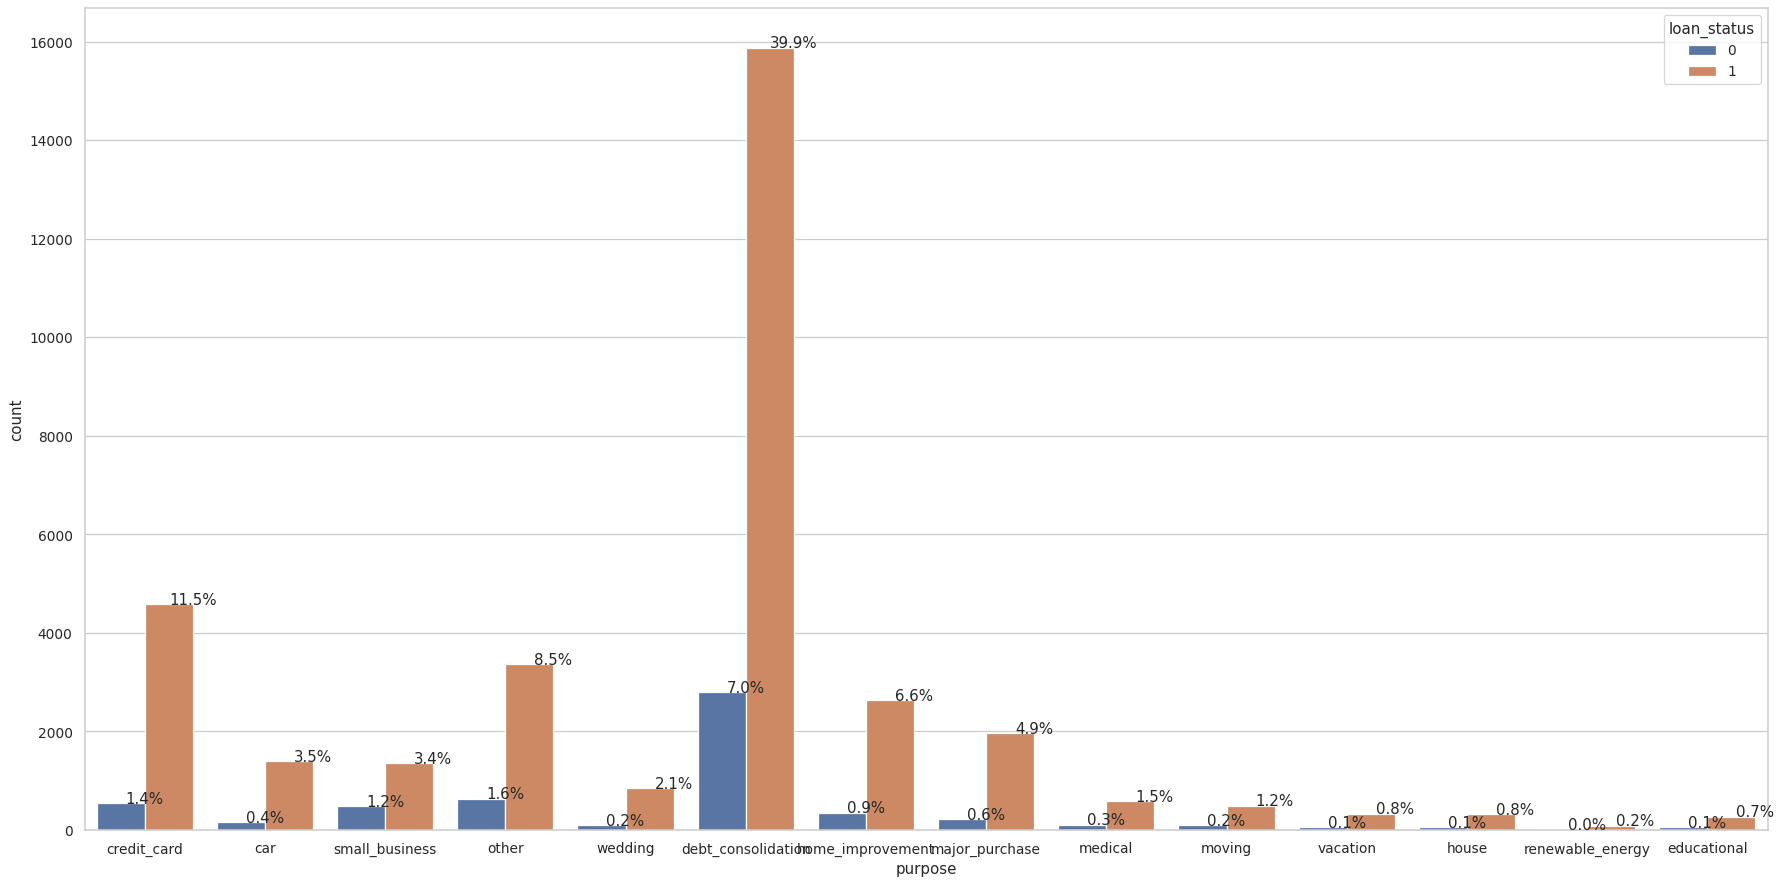

In [40]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 10),dpi = 90)
total = float(len(df))
ax = sns.countplot(x="purpose", hue="loan_status", data=df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

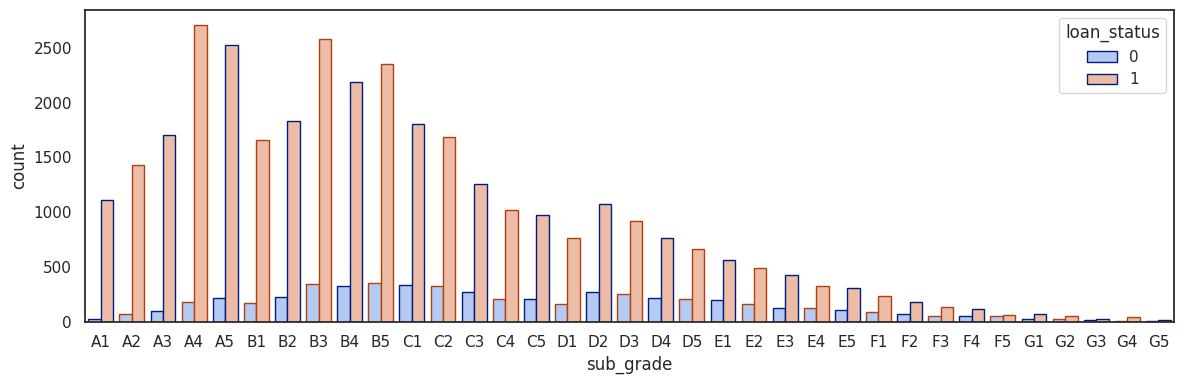

In [24]:
# Creating sub grade plot
plt.figure(figsize=(12,4))
sub_order=sorted(df["sub_grade"].unique())
sns.countplot(x='sub_grade',data=df,order=sub_order,palette="coolwarm",hue="loan_status",
              edgecolor=sns.color_palette("dark", 2))

## Observation:It looks like F and G sub-grades don't get paid back that often.

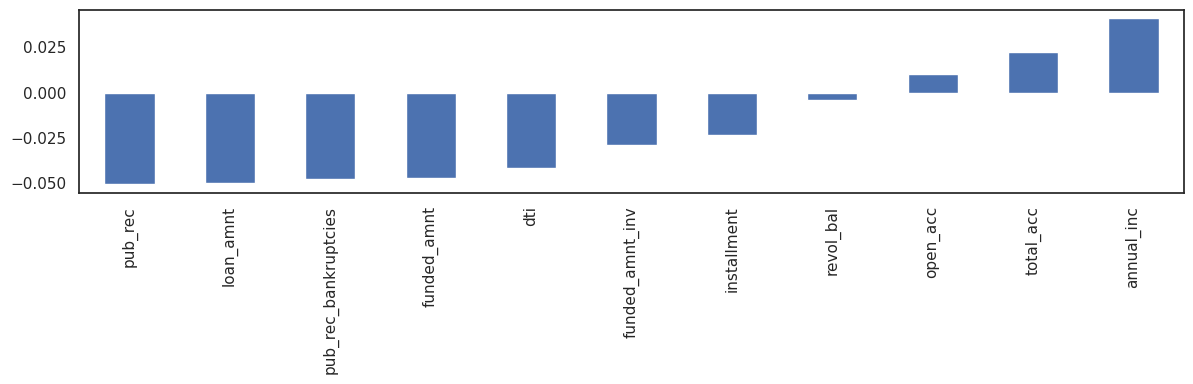

In [25]:
#creating corelation plot
df.corr()["loan_status"].sort_values().drop("loan_status").plot(kind="bar")

## Observation: Annual income is one of the important factor in deciding factor in loan repayment.

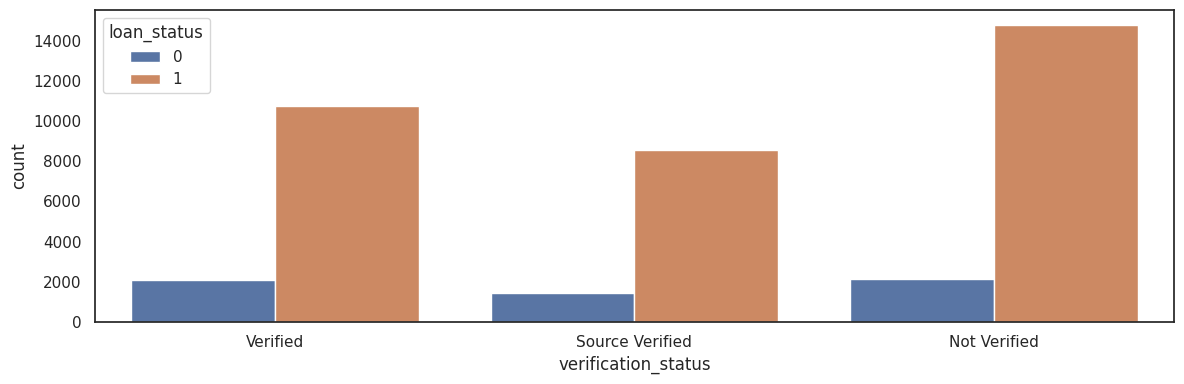

In [26]:

#verification status graph
plt.figure(figsize=(12,4))
sns.countplot(x="verification_status",data=df,hue="loan_status")

## Observation : More verified people defaulted than the not verified which calls for better verification process.

In [27]:
#checking missing values in %
(df.isnull().sum()/len(df))*100

loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               6.200674
emp_length              2.709496
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.027648
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.125672
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
pub_rec_bankruptcies    1.751873
dtype: float64

In [28]:
df["emp_title"].value_counts()

US Army                          134
Bank of America                  109
IBM                               66
AT&T                              60
Kaiser Permanente                 57
                                ... 
Self employed Court Reporter       1
Jewish Family Services             1
tolt service group                 1
Spherion Managed Services          1
Beam Global Spirits and Wines      1
Name: emp_title, Length: 28862, dtype: int64

In [29]:
#dropping the emp title since too many professions are there
df.drop("emp_title",axis=1,inplace=True)

In [30]:
#checking unique values in employ length
sorted(df["emp_length"].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [31]:
#creating an ordered list of employes
emp_order=['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years'
 ]

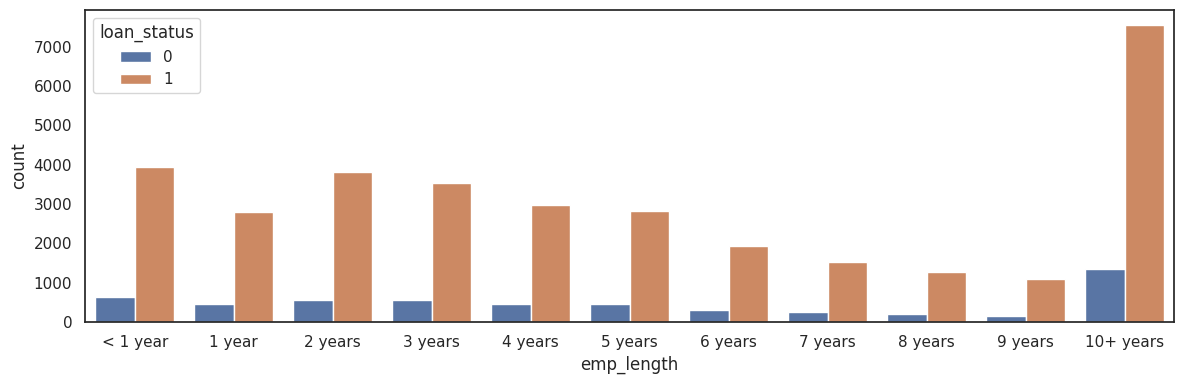

In [32]:
#creating employ length count plot setting hue as loan status
plt.figure(figsize=(12,4))
sns.countplot(x="emp_length",data=df,order=emp_order,hue="loan_status")

In [33]:
#count of people those who didnt pay considering there emp length
emp_co=df[df["loan_status"]==0].groupby("emp_length").count()["loan_status"]

#count of people those who did pay considering there emp length
emp_fp=df[df["loan_status"]==1].groupby("emp_length").count()["loan_status"]

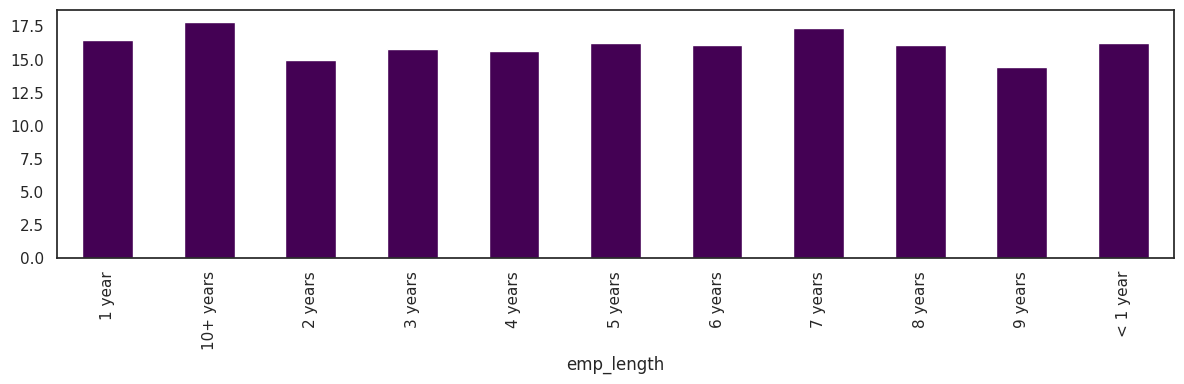

In [34]:
# % of people whoc didnt pay there loan considering there emp length
co_pre=emp_co*100/emp_fp

co_pre.plot(kind="bar",colormap="viridis")

## Observations: Not a deciding factor because distribution is somewhat uniform across the employment length

In [35]:
#hence dropping emp length
df.drop("emp_length",axis=1,inplace=True)

In [36]:
df["purpose"].head(10)

0           credit_card
1                   car
2        small_business
3                 other
4                 other
5               wedding
6    debt_consolidation
7                   car
8        small_business
9                 other
Name: purpose, dtype: object

In [37]:
df['title'].head(10)

0                                 Computer
1                                     bike
2                     real estate business
3                                 personel
4                                 Personal
5    My wedding loan I promise to pay back
6                                     Loan
7                          Car Downpayment
8     Expand Business & Buy Debt Portfolio
9              Building my credit history.
Name: title, dtype: object

In [38]:
#since reflecting the same information hence dropping the column
df.drop("title",inplace=True,axis=1)

## Categorical Variables and Dummy Variables

In [39]:
df.select_dtypes(["object"]).columns

Index(['term', 'int_rate', 'grade', 'sub_grade', 'home_ownership',
       'verification_status', 'issue_d', 'purpose', 'zip_code', 'addr_state',
       'earliest_cr_line', 'revol_util', 'initial_list_status',
       'application_type'],
      dtype='object')

In [40]:
#converting 36 mont to 36 numeric and same for 60
df["term"]=df["term"].apply(lambda x:int(x[:3]))

In [41]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,pub_rec_bankruptcies
0,5000.0,5000.0,4975.0,36,10.65%,162.87,B,B2,RENT,24000.0,...,27.65,Jan-1985,3.0,0.0,13648.0,83.7%,9.0,f,Individual,0.0
1,2500.0,2500.0,2500.0,60,15.27%,59.83,C,C4,RENT,30000.0,...,1.00,Apr-1999,3.0,0.0,1687.0,9.4%,4.0,f,Individual,0.0
2,2400.0,2400.0,2400.0,36,15.96%,84.33,C,C5,RENT,12252.0,...,8.72,Nov-2001,2.0,0.0,2956.0,98.5%,10.0,f,Individual,0.0
3,10000.0,10000.0,10000.0,36,13.49%,339.31,C,C1,RENT,49200.0,...,20.00,Feb-1996,10.0,0.0,5598.0,21%,37.0,f,Individual,0.0
4,3000.0,3000.0,3000.0,60,12.69%,67.79,B,B5,RENT,80000.0,...,17.94,Jan-1996,15.0,0.0,27783.0,53.9%,38.0,f,Individual,0.0


In [42]:
#For int_rate and revol_util columns we need to remove the '%' and convert to float value.
#df = df.drop(["last_credit_pull_d", "addr_state", "title", "earliest_cr_line","pymnt_plan"], axis = 1)

df['int_rate'] = df['int_rate'].str.rstrip('%').astype("float")
df['revol_util'] = df['revol_util'].str.rstrip('%').astype("float")

In [43]:
# dropping dropping grade
df.drop("grade",axis=1,inplace=True)

In [44]:
#checking unique values for subgrade
df["sub_grade"].unique()

array(['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F4', 'F1', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1',
       'F5', 'G5'], dtype=object)

In [45]:
#converting the sub grade into dummy variables
dummies=pd.get_dummies(df["sub_grade"],drop_first=True)

#concatinating with orginal data
df=pd.concat([df.drop("sub_grade",axis=1),dummies],axis=1)

In [46]:
#doing same thing for other categorical variables
dummies=pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose']],drop_first=True)

#concatinating with orginal data
df=pd.concat([df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1),dummies],axis=1)

In [47]:
#replacing none and any with other
df["home_ownership"]=df["home_ownership"].replace(["NONE","ANY"],"OTHER")

In [48]:
#dropping and adding 
dummies=pd.get_dummies(df["home_ownership"],drop_first=True)

#concatinating with orginal data
df=pd.concat([df.drop("home_ownership",axis=1),dummies],axis=1)

In [49]:
#earliesr cr line extracting the year only
df["earliest_cr_line"]=df["earliest_cr_line"].apply(lambda x:int(x[-4:]))

In [50]:
df = df.drop(["funded_amnt","funded_amnt_inv", "issue_d"], axis = 1)
df = df.drop(["zip_code"], axis = 1)
df = df.drop(["pub_rec_bankruptcies",], axis = 1)
df = df.drop(["addr_state",], axis = 1)

In [51]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39786 entries, 0 to 39785
Data columns (total 65 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            39786 non-null  float64
 1   term                                 39786 non-null  int64  
 2   int_rate                             39786 non-null  float64
 3   installment                          39786 non-null  float64
 4   annual_inc                           39786 non-null  float64
 5   loan_status                          39786 non-null  int64  
 6   dti                                  39786 non-null  float64
 7   earliest_cr_line                     39786 non-null  int64  
 8   open_acc                             39786 non-null  float64
 9   pub_rec                              39786 non-null  float64
 10  revol_bal                            39786 non-null  float64
 11  revol_util                  

In [76]:
df = df.replace(to_replace='None', value=np.nan).dropna()
# Below are a quick example
# Drop all rows with NaN values
df=df.dropna()
df=df.dropna(axis=0)
df = df.astype(float)
# Reset index after drop
df=df.dropna().reset_index(drop=True)
# Drop Rows with NaN Values inplace
df.dropna(inplace=True)

In [77]:
df.isnull().any(axis=0) 
df.isnull().any(axis=1)

0        False
1        False
2        False
3        False
4        False
         ...  
39731    False
39732    False
39733    False
39734    False
39735    False
Length: 39736, dtype: bool

## Machine Learning Algorithms Training and Testing
## Train Test Split

In [78]:
from sklearn.model_selection import train_test_split
#sampling the data
data=df.sample(frac=.5,random_state=101)
#dividing data into feature and target
X=data.drop("loan_status",axis=1).values
y=data["loan_status"].values

#spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Normalizing the Data

In [79]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler
#scaling the data
#scaler=MinMaxScaler()
scaler=RobustScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Creating the Model

In [80]:
#trying other Models
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score,auc
import warnings
warnings.filterwarnings('ignore')

In [81]:
clf=[LinearSVC(),
     LogisticRegression(random_state=0,solver='lbfgs',max_iter=1000),
     GaussianNB(),
     RandomForestClassifier(random_state=0,n_estimators=10),
     GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0),
     XGBClassifier()]

In [82]:
import pickle
def model_clf(x):
    cl=x
    cl.fit(X_train,y_train)
    filename = str(x)[:8]+'atlcV1'+'minusIBT'+'.sav'
    pickle.dump(cl, open(filename, 'wb'))
    predict=cl.predict(X_test)
    print(classification_report(y_test,predict))
    print(confusion_matrix(y_test,predict))

In [83]:
for x in clf:
    model_clf(x)

              precision    recall  f1-score   support

         0.0       0.33      0.00      0.00       534
         1.0       0.87      1.00      0.93      3440

    accuracy                           0.87      3974
   macro avg       0.60      0.50      0.47      3974
weighted avg       0.79      0.87      0.80      3974

[[   1  533]
 [   2 3438]]
              precision    recall  f1-score   support

         0.0       0.25      0.00      0.01       534
         1.0       0.87      1.00      0.93      3440

    accuracy                           0.86      3974
   macro avg       0.56      0.50      0.47      3974
weighted avg       0.78      0.86      0.80      3974

[[   2  532]
 [   6 3434]]
              precision    recall  f1-score   support

         0.0       0.25      0.32      0.28       534
         1.0       0.89      0.85      0.87      3440

    accuracy                           0.78      3974
   macro avg       0.57      0.59      0.58      3974
weighted avg       0

## Binary Classification using ANN

In [84]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
#import logging
#logging.getLogger('tensorflow').setLevel(logging.ERROR)
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

In [85]:
#running model
#creating model 
model = Sequential()

#adding layer
model.add(Dense(78,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(39,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(19,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(19,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam")

#parameters for early stopping
early_stop=EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=5)

In [86]:
#running the model
model.fit(x=X_train,y=y_train,epochs=25,batch_size=256,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/25
63/63 [==============================] - 0s 3ms/step - loss: 0.5779 - val_loss: 0.3971
Epoch 2/25
63/63 [==============================] - 0s 2ms/step - loss: 0.4340 - val_loss: 0.3819
Epoch 3/25
63/63 [==============================] - 0s 2ms/step - loss: 0.4125 - val_loss: 0.3756
Epoch 4/25
63/63 [==============================] - 0s 2ms/step - loss: 0.4021 - val_loss: 0.3728
Epoch 5/25
63/63 [==============================] - 0s 2ms/step - loss: 0.3996 - val_loss: 0.3739
Epoch 6/25
63/63 [==============================] - 0s 2ms/step - loss: 0.3984 - val_loss: 0.3697
Epoch 7/25
63/63 [==============================] - 0s 2ms/step - loss: 0.3961 - val_loss: 0.3683
Epoch 8/25
63/63 [================

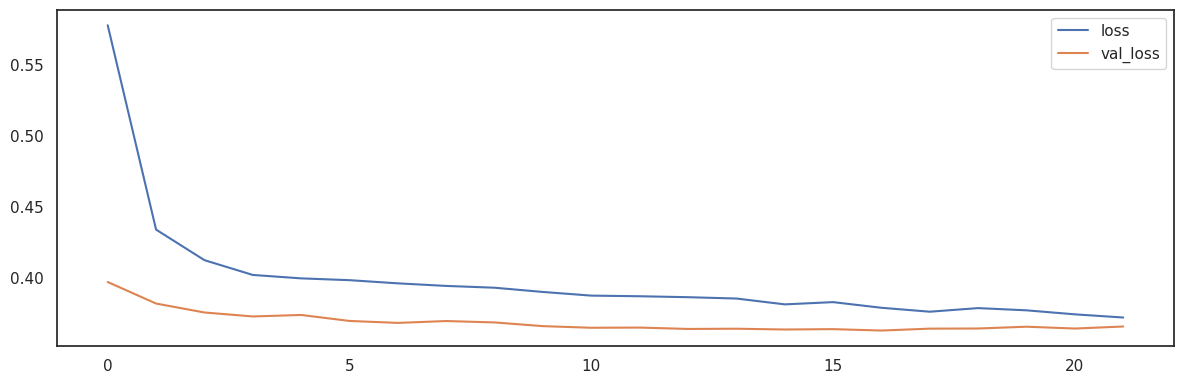

In [87]:
#plotting the losses
loss=pd.DataFrame(model.history.history)

loss.plot()

In [88]:
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score,auc
import warnings
warnings.filterwarnings('ignore')
predict=model.predict_classes(X_test)
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

         0.0       0.25      0.00      0.01       534
         1.0       0.87      1.00      0.93      3440

    accuracy                           0.86      3974
   macro avg       0.56      0.50      0.47      3974
weighted avg       0.78      0.86      0.80      3974



In [89]:
pd.DataFrame(confusion_matrix(y_test,predict))

,0,1
0,2,532
1,6,3434


## Handling Imbalanced Data For a Classification Problem to achieve better F1-Score

## a. Resampling (Oversampling and Undersampling)

## b. SMOTE (Synthetic Minority Oversampling Technique or SMOTE )


In [90]:
df['loan_status'].value_counts()

1.0    34082
0.0     5654
Name: loan_status, dtype: int64

## a. Resampling (Oversampling)

In [91]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df[(df['loan_status']==1)] 
df_minority = df[(df['loan_status']==0)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 34082, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [92]:
df_upsampled['loan_status'].value_counts()

1.0    34082
0.0    34082
Name: loan_status, dtype: int64

In [93]:
import pickle
def model_clf(x):
    cl=x
    cl.fit(X_train,y_train)
    filename = str(x)[:8]+'atlcV2'+'ibtResample'+'.sav'
    pickle.dump(cl, open(filename, 'wb'))
    predict=cl.predict(X_test)
    print(classification_report(y_test,predict))
    print(confusion_matrix(y_test,predict))

#sampling the data
data=df_upsampled.sample(frac=.5,random_state=101)

#scaling the data
#scaler=MinMaxScaler()
scaler=RobustScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

#dividing data into feature and target
X=data.drop("loan_status",axis=1).values
y=data["loan_status"].values

#spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

for x in clf:
    model_clf(x)

              precision    recall  f1-score   support

         0.0       0.56      0.68      0.62      3367
         1.0       0.61      0.48      0.54      3450

    accuracy                           0.58      6817
   macro avg       0.59      0.58      0.58      6817
weighted avg       0.59      0.58      0.58      6817

[[2300 1067]
 [1779 1671]]
              precision    recall  f1-score   support

         0.0       0.63      0.57      0.60      3367
         1.0       0.61      0.67      0.64      3450

    accuracy                           0.62      6817
   macro avg       0.62      0.62      0.62      6817
weighted avg       0.62      0.62      0.62      6817

[[1914 1453]
 [1146 2304]]
              precision    recall  f1-score   support

         0.0       0.62      0.59      0.60      3367
         1.0       0.61      0.64      0.63      3450

    accuracy                           0.61      6817
   macro avg       0.61      0.61      0.61      6817
weighted avg       0

In [ ]:
!pip install -U imbalanced-learn

## b. SMOTE : SMOTE looks into minority class instances and use k nearest neighbor to select a random nearest neighbor, and a synthetic instance is created randomly in feature space.

In [94]:
from imblearn.over_sampling import SMOTE
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(df.drop('loan_status', axis=1), df['loan_status'])
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

In [95]:
import pickle
def model_clf(x):
    cl=x
    cl.fit(X_train,y_train)
    filename = str(x)[:8]+'atlcV3'+'ibtSMOTE'+'.sav'
    pickle.dump(cl, open(filename, 'wb'))
    predict=cl.predict(X_test)
    print(classification_report(y_test,predict))
    print(confusion_matrix(y_test,predict))

#sampling the data
data=oversampled.sample(frac=.5,random_state=101)

#scaling the data
#scaler=MinMaxScaler()
scaler=RobustScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

#dividing data into feature and target
X=data.drop("loan_status",axis=1).values
y=data["loan_status"].values

#spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

for x in clf:
    model_clf(x)

              precision    recall  f1-score   support

         0.0       0.51      1.00      0.68      3479
         1.0       0.22      0.00      0.00      3338

    accuracy                           0.51      6817
   macro avg       0.37      0.50      0.34      6817
weighted avg       0.37      0.51      0.35      6817

[[3472    7]
 [3336    2]]
              precision    recall  f1-score   support

         0.0       0.64      0.57      0.60      3479
         1.0       0.59      0.66      0.63      3338

    accuracy                           0.61      6817
   macro avg       0.62      0.61      0.61      6817
weighted avg       0.62      0.61      0.61      6817

[[1969 1510]
 [1123 2215]]
              precision    recall  f1-score   support

         0.0       0.61      0.74      0.67      3479
         1.0       0.65      0.50      0.57      3338

    accuracy                           0.62      6817
   macro avg       0.63      0.62      0.62      6817
weighted avg       0

In [ ]:
#Use the saved model for new predictions
import pickle
# load the model from disk
loaded_model = pickle.load(open('XGBClassV3ibtSMOTE.sav', 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)